# **Arboles de decision**

Ventajas:

Claridad en los datos

1.   Tolerantes al ruido y datos faltantes
2.   Las reglas extraídas permiten hacer extracciones
3.   Claridad en los datos


Desventajas:

1.   Sobreajuste-overfitting
2.   Criterio de división es deficiente
3.   Ramas poco significativas
4.   Optimización del modelo
5.   Evitar sobreajuste
6.   Selección efectiva de los atributos
7.   Campos nulos



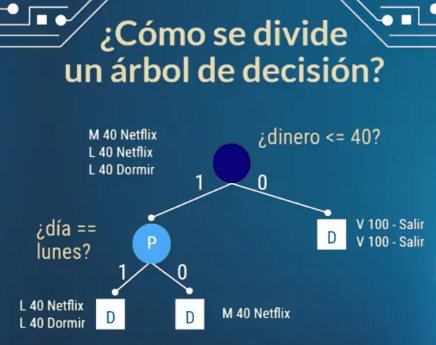

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [2]:
test_df = pd.read_csv("/content/titanic-test.csv")
train_df = pd.read_csv("/content/titanic-train.csv")

In [3]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info()
#Importante no tener nulos para una mejor prediccion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<function matplotlib.pyplot.show>

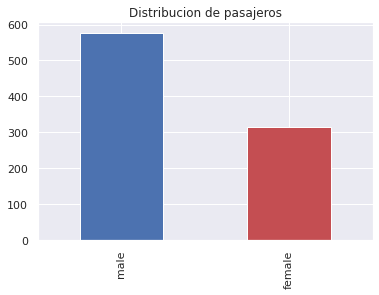

In [12]:
 #Tipo de dato en especifico

 train_df.Sex.value_counts().plot(kind = "bar", color = ["b", "r"])
 plt.title("Distribucion de pasajeros")
 plt.show

Ésta línea: encoder_sex = label_encoder.fit_transform(data_set_train[‘Sex’]) , transforma una etiqueta textual a un equivalente numérico.

In [13]:
#dividamos en solo lo que necesitamos

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

#Informacion numerica, categorica

encoder_sex = label_encoder.fit_transform(train_df["Sex"])
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Cuando se llenan los espacios con vacíos (fillna), para el caso de datos numéricos se utiliza la mediana porque es una de las medidas de tendencia central que menos se afecta por los datos atípicos.

Para el caso de los datos categóricos relacionados con el embarque, se utiliza la letra S porque representa el embarque en la ciudad de South Hampton, en donde más personas se unieron al viaje.

Estos datos se obtienen de un análisis previo a los datos trabajados.

In [14]:
#Tratamiento de datos nulos  o vacios con la media

train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
train_df["Embarked"] = train_df["Embarked"].fillna("S")

Cuando se hace el drop intentando eliminar algunas variables que no serán de interés, axis = 1 indica que estas variables son "columnas ", axis = 0 , indicaría que son filas.

Ésta línea: categorical_cols = [cname for cname in train_predictors.columns if
train_predictors[cname].nunique() <10 and
train_predictors[cname].dtype == ‘object’
]
Encuentra las columnas que contiene información no numérica.

In [22]:
#cambios como eliminar atributos no utiles para evitar problemas

train_predictors = train_df.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis = 1)


#Tomar los datos categoricos, recorremos y si se cumplen las condiciones de ser dato unico menores a 10 y 
#tipo de dato objeto significa que es categorica
categorical_cols = [cname for cname in train_predictors.columns if train_predictors[cname].nunique() < 10 
                    and train_predictors[cname].dtype == "object"]

Ésta línea: numerical_cols = [cname for cname in train_predictors.columns if
train_predictors[cname].dtype in [‘int64’, ‘float64’]
]
Encuentra las columnas con datos numéricos.

In [24]:
#Ahora necesito las numericas

numerica_cols = [cname for cname in train_predictors.columns if 
                 train_predictors[cname].dtype in ["int64", "float64"]]

In [25]:
#Union de ambos tipos de datos

my_cols = categorical_cols + numerica_cols

train_predictors = train_predictors[my_cols]

las dummy variables convierten las variables categóricas en indicadoras como 0,1,2,…etc

In [27]:
#Dummy para prediccion precisa, permite crear info dummy, creada anteriormente por las columnas

dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [29]:
#Obtener las clases del entrenamiento

train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# **Division de los datos**

In [30]:
#target, variable predictoria

y_target = train_df["Survived"].values
x_features_ones = dummy_encoded_train_predictors.values

In [31]:
#random state para que cada que corremos el modelo sume una sesion nueva
x_train, c_validation, y_train, y_validation = train_test_split(x_features_ones, y_target, test_size = 0.25, random_state =1)

In [34]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_ones, y_target)

Si llega un nuevo valor tendra un valor del 97% de probabilidad que le agregue la etiqueta correctamente

In [35]:
tree_one_accuracy = round(tree_one.score(x_features_ones, y_target), 4)
print("Accuracy: %0.4f" %(tree_one_accuracy))

Accuracy: 0.9798


# Graficamos el arbol

In [36]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file = out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png("titanic.png")

True

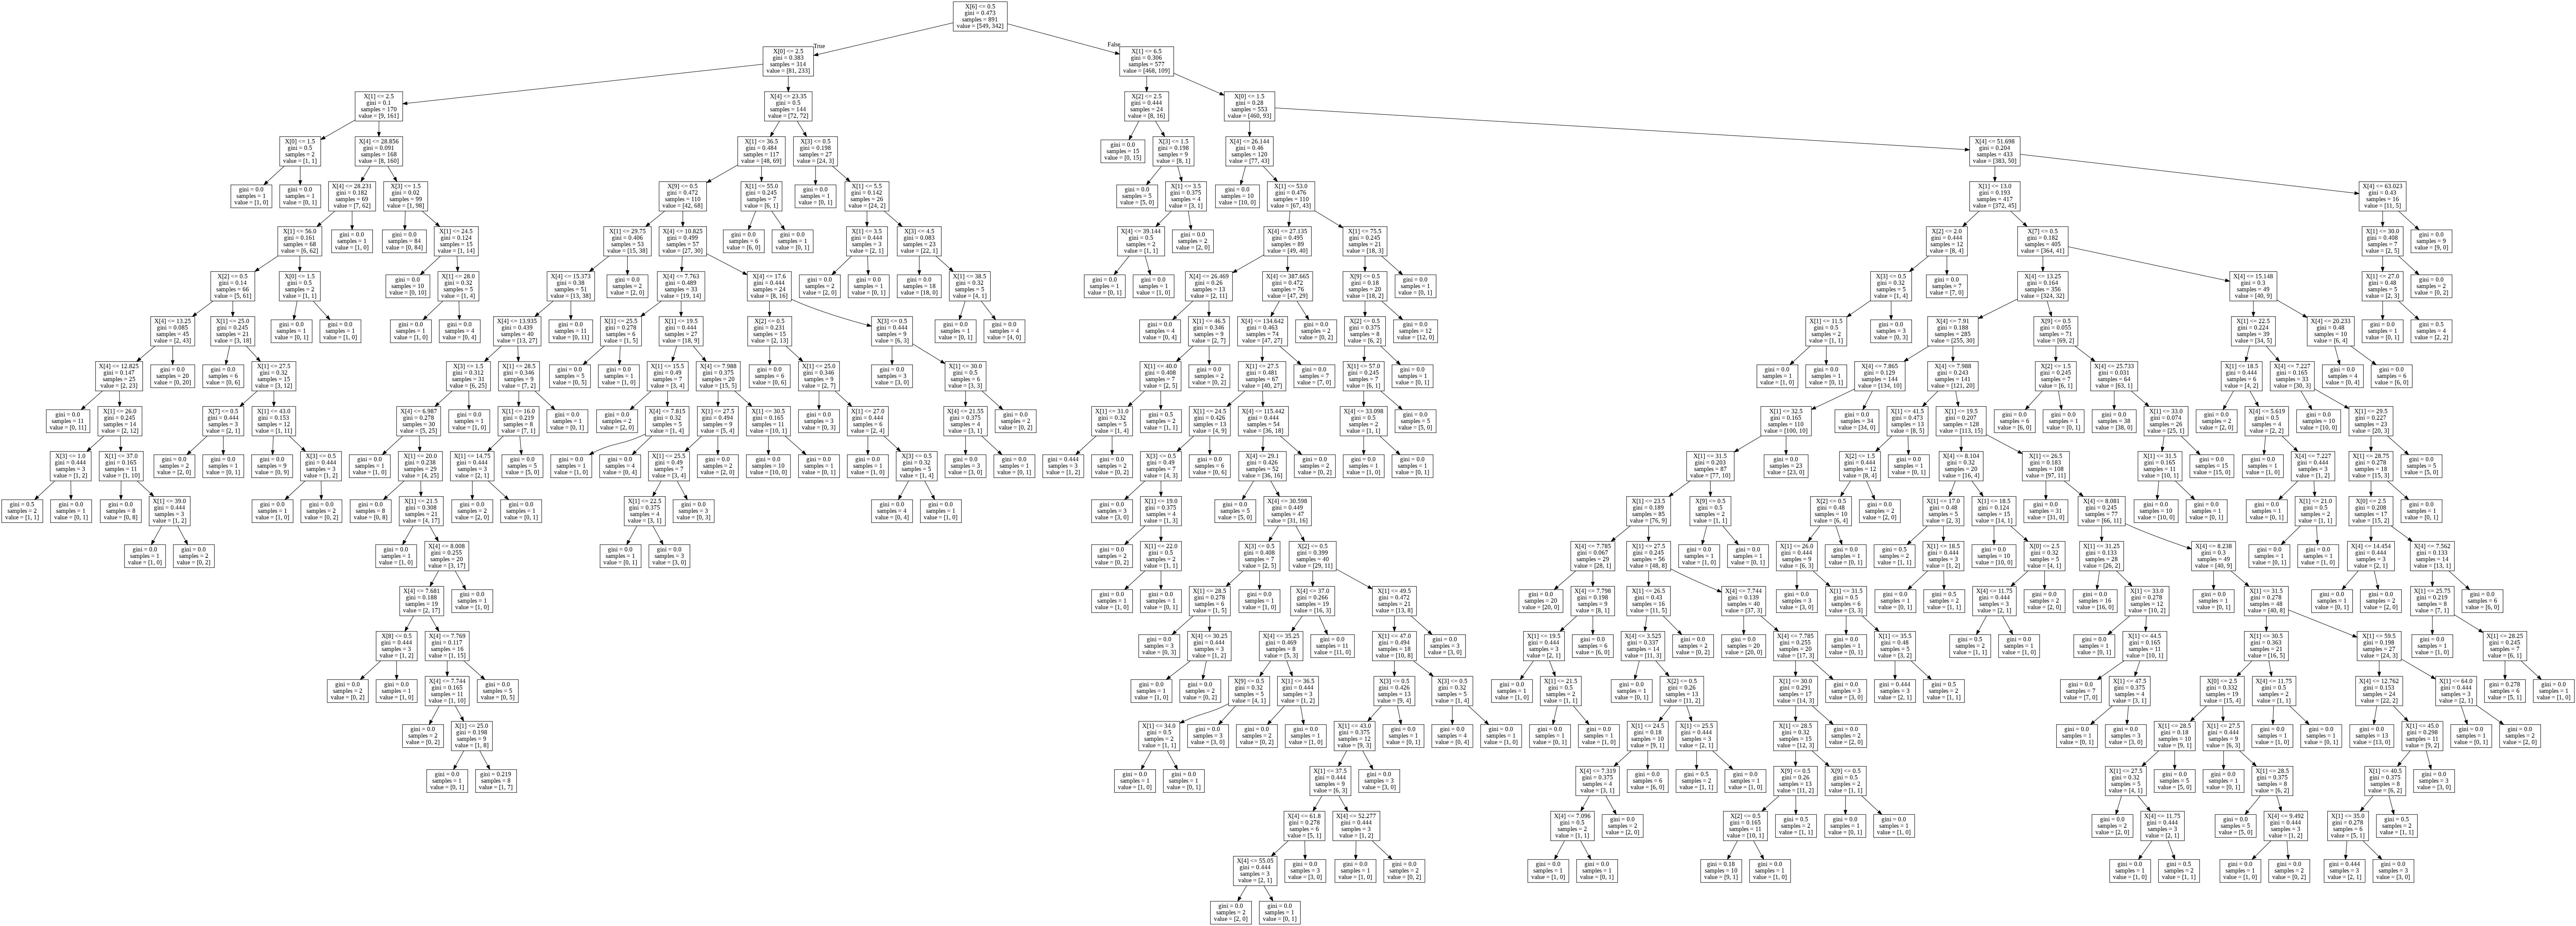